In [100]:
import numpy as np
#import pandas as pd

import torch
import torch.nn as nn

from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

## Överblick

**Målet med dagens övning  modifiera våra neuroner samt träningsloop till att kunna lösa binära klassificeringsproblem.**

Vi kommer skapa vår egen data mha scikit-learn.

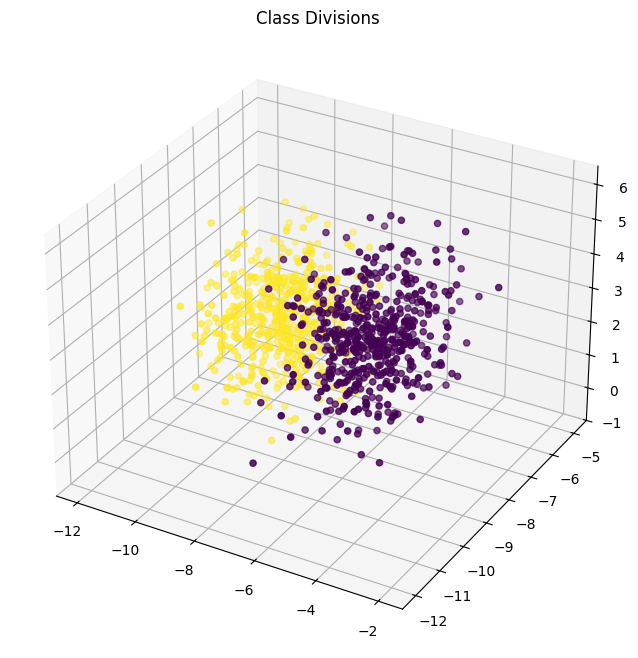

In [101]:
coordinates, labels = make_blobs(n_samples=[500,500], 
                                 n_features=3, random_state=41)

# visualisera de nyss skapade blobsen

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")

ax.scatter3D(coordinates[:,0],
             coordinates[:,1],
             coordinates[:,2], 
             c=labels)

ax.set_title("Class Divisions");

## Dela upp data i train/test och utför nödvändiga transformationer

Som vi diskuterat behöver vi kunna uppskatta prestanda som kan förväntas uppnås i  en skarp, produktionssatt situation. Att enbart evaluera på träningsdata är därför inte lämpligt. Vi delar därför upp vårt dataset i en train- och en testsplit.

Vi väljer att göra det i proportionen 90/10.

In [102]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(coordinates,
                                                    labels,
                                                    test_size=0.1, 
                                                    random_state=42)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(900, 3)
(900,)
(100, 3)
(100,)


**Skala data**

Nu behöver vi på enklaste sätt bara skala om kolumnerna så att samtliga värden, till absolutbeloppet, inte blir särskilt mycket större än 1. Vi ser i vår illustrering ovan att så inte är fallet nu - utan att samtliga koordinater antar större värden än så.

Ett supersimpelt trick för att åstadkomma detta är att helt enkelt dela respektive kolumn, med det (till absolutbeloppet) högsta värdet. Då kommer samtliga värden skalas ner, och det högsta värdet i respektive kolumn vara (i absolut värde) 1.

**Kom dock ihåg att det är superviktigt att vi endast använder statistik från train split när vi transformerar, annars riskerar vi informationsläckage!**

Detta var anledningen till att vi delade upp datasetet i train/test-split innan vi började med dessa invasiva ingrepp.

In [103]:
x_train

array([[ -4.99598264,  -9.6018541 ,   3.59395654],
       [-10.499856  ,  -8.18806395,   1.83037061],
       [ -8.86734177,  -8.44753588,   2.39082322],
       ...,
       [ -8.76655294,  -8.34580358,   2.67350921],
       [ -8.06938943,  -8.11328837,   1.27650957],
       [-10.34690484,  -6.49720325,   2.0206238 ]])

In [104]:
from sklearn.preprocessing import StandardScaler

for i in range(3):                               # iterera över alla vår tre coordinater
    
    highest_value = max(np.abs(x_train[:,i]))    # hitta det, till absolutbeloppet, högsta värdet i aktuella kolumn i x_train
    
    # dela nu aktuell kolumn i x_train med det nyfunna högsta värdet
    
    x_train[:,i] = x_train[:,i] / highest_value 
    
    # dela nu även motsvarande kolumn i x_test med SAMMA nyfunna högsta värde (från x_train)
    
    x_test[:,i] = x_test[:,i] / highest_value

Vi kan nu återigen visualisera vår data, som en sanity check. Lägg märke till skalan.

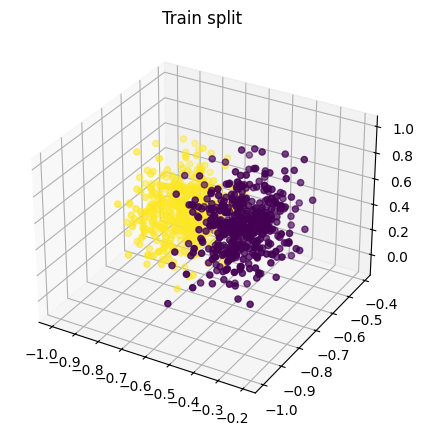

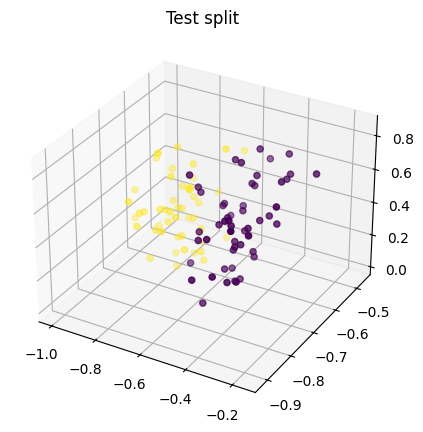

In [105]:
fig = plt.figure(figsize = (5, 5))
ax = plt.axes(projection ="3d")

ax.scatter3D(x_train[:,0],
             x_train[:,1],
             x_train[:,2], 
             c=y_train)

ax.set_title("Train split");

plt.show()

fig = plt.figure(figsize = (5, 5))
ax = plt.axes(projection ="3d")

ax.scatter3D(x_test[:,0],
             x_test[:,1],
             x_test[:,2], 
             c=y_test)

ax.set_title("Test split");

**Omvandla till Tensor**

Nu när siffrorna ser bra ut återstår det att omvandla till datatypen Tensor (optimal för PyTorch)

In [99]:
x_train = torch.from_numpy(x_train).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train).type(torch.FloatTensor).reshape([-1,1])

x_test = torch.from_numpy(x_test).type(torch.FloatTensor)
y_test = torch.from_numpy(y_test).type(torch.FloatTensor).reshape([-1,1])

training_set = list(zip(x_train, y_train))             # lägg ihop träningsdatan så att vi direkt kan skicka in i dataloader
test_set = list(zip(x_test, y_test))                   # ditto för testdatan

TypeError: expected np.ndarray (got Tensor)

In [107]:
torch.from_numpy(y_train).type(torch.FloatTensor).reshape([-1,1])

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [108]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [109]:
np.arange(6).reshape((3, 2))

array([[0, 1],
       [2, 3],
       [4, 5]])

In [117]:
np.arange(6).reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

## Skapa Neurons med Sigmoid-aktiveringsfunktion i PyTorch

In [49]:
import torch.nn as nn

class neuron(nn.Module):
    def __init__(self, input_size):
        super(neuron, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)                  
        return x

In [50]:
input_size = 3

model = neuron(3)
model

neuron(
  (fc): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

**KONTROLLFRÅGA: hur många parametrar har den här modellen?**

4

Låt oss testa vad vår, hitills otränade, modell spottar ut sig för output

In [51]:
sample = 200                                     # välj här vilken sample som helst, ange värde mellan 0-899

sample_features = x_train[sample]                # extrahera features
sample_class = y_train[sample]                   # extrahera class (1 eller 0)

model_prediction = model(sample_features)        # predicta outcome

In [52]:
print('True class              :', sample_class.item())
print('Vår models predict      :', model_prediction.item())

True class              : 0.0
Vår models predict      : 0.4018365740776062


Notera att, för vilken sample du än väljer, så spottar vår modell ut sig värden mellan 0 och 1! Sigmoid-aktiveringsfunktion säkerställer detta.


Det kan kanske också se ut som att vår modell verkar predicta någorlunda bra so far, eftersom att både True outcome och våra predictions endast antar värden mellan 0 och 1 och således inte ligger så långt ifrån varandra - men alla våra predictions är helt random at this point, var så säkra. Testa själv med olika samples.Sannolikheterna vi spottar ur nonsens.

Och det är ju inte så konstigt - för vi har ju inte tränat något än!

## Träna

Observera att vi i koden nedan lagt till ytterliggare en sektion kod under vår epoch-loop. Denna ansvarar för att evaluera koden. 

Ignorera den för nu - du kommer få jobba med den strax.

In [53]:
from torch.optim import SGD
from torch.utils.data import DataLoader

In [77]:
input_size = 3                       
batch_size = 16

epochs = 5                    # antal loopar genom dataloader vi låter vår modell träna på vårt dataset.
learning_rate = 0.01          # hur stora steg gradient descent tar.

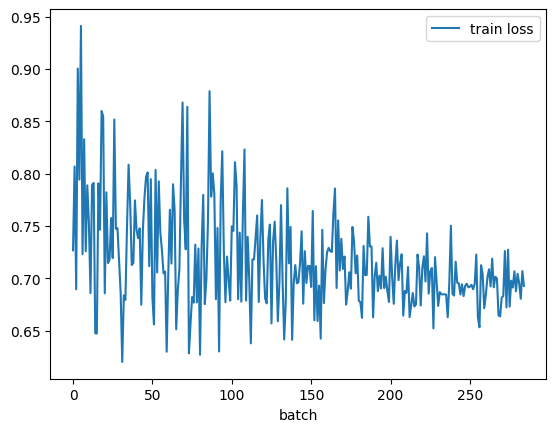

In [78]:
# ----------------------------------------------------------------------------------------------------------------
#    initera modell, loss_function, optimizer & dataloader


model = neuron(input_size)
optimizer = SGD(model.parameters(), lr = learning_rate)
loss_function = torch.nn.BCELoss()

train_dataloader = DataLoader(training_set,                 
                              batch_size = batch_size,       
                              shuffle=True)


# ----------------------------------------------------------------------------------------------------------------
#    träna


batch_losses = []
evaluation_losses = []

for i in range(epochs):
    
    model.train()
    
    for batch in train_dataloader:
        
        y_true = batch[1]
        input_features = batch[0]
        
        y_pred=model(input_features)
        loss=loss_function(y_pred, y_true)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        batch_loss = loss.item()
        batch_losses.append(batch_loss)

# ----------------------------------------------------------------------------------------------------------------
#   evalueringssektion 

    model.eval()
    
    y_true = y_test
    input_features = x_test
    
    y_pred = model(input_features)
    loss = loss_function(y_pred, y_true)
    
    evaluation_loss = loss.item()
    evaluation_losses.append(evaluation_loss)
    
        
plt.plot(batch_losses, label='train loss');
plt.legend()
plt.xlabel('batch')
plt.show()

In [79]:

# ----------------------------------------------------------------------------------------------------------------
#    träna

def train_model(input_size=3, batch_size=16, epochs=5, learning_rate=0.01, training_set=training_set):

    model = neuron(input_size)
    optimizer = SGD(model.parameters(), lr = learning_rate)
    loss_function = torch.nn.BCELoss()

    train_dataloader = DataLoader(training_set,                 
                                batch_size = batch_size,       
                                shuffle=True)

    batch_losses = []
    evaluation_losses = []

    for i in range(epochs):
        
        model.train()
        
        for batch in train_dataloader:
            
            y_true = batch[1]
            input_features = batch[0]
            
            y_pred=model(input_features)
            loss=loss_function(y_pred, y_true)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            batch_loss = loss.item()
            batch_losses.append(batch_loss)

    # ----------------------------------------------------------------------------------------------------------------
    #   evalueringssektion 

        model.eval()
        
        y_true = y_test
        input_features = x_test
        
        y_pred = model(input_features)
        loss = loss_function(y_pred, y_true)
        
        evaluation_loss = loss.item()
        evaluation_losses.append(evaluation_loss)

    return batch_losses, evaluation_losses, train_dataloader
    

def plot_loss(batch_losses=None, epoch=None, learning_rate=None, evaluation_losses=None, train_dataloader=None, num_epochs=None):     
    plt.plot(batch_losses, label='train loss')
    if evaluation_losses:
        plt.plot(np.arange(0, num_epochs)*(len(train_dataloader)), evaluation_losses, label='test loss')
    plt.legend()
    plt.title(f'Epoch: {epoch} | Learning Rate: {learning_rate}')
    plt.xlabel(f'epoch')
    plt.show()

In [84]:
np.arange(0, 2)

array([0, 1])

In [81]:
len(train_dataloader)

57

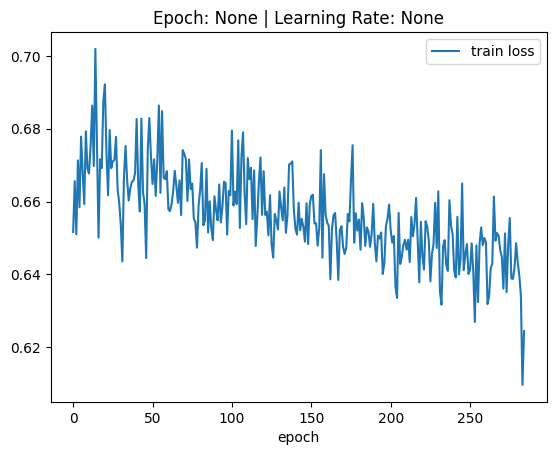

In [82]:
batch_losses, evaluation_losses, train_dataloader = train_model()
plot_loss(batch_losses)

## Uppgifter

**1)**

Vi ska nu utforska sambandet mellan number of epochs och learning rate. Vi ska testa kombinationer av olika värden på dessa parametrar, och se hur det påverkar vår loss.

Låt oss testa följande värden:

epochs = [1,5,10,100,200]

learning_rates = [0.0001, 0.001, 0.01, 0.1]

Testa varje möjlig kombination av dessa värden, dvs

    for epoch in epochs:
    
        for learning_rate in learning_rates:
        
            run training loop
            plot(loss)
        
*Vad ser du för kurvor? Vad upptäcker du för samband? Does it make sense?*

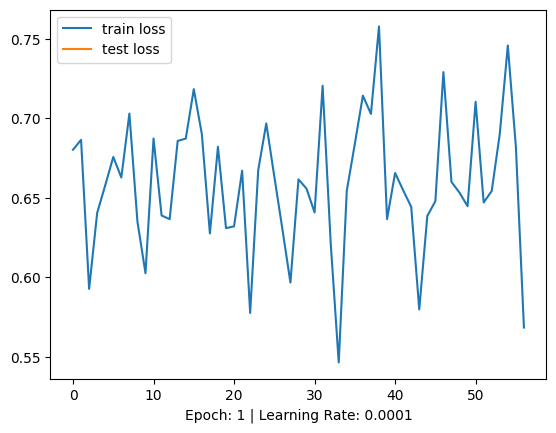

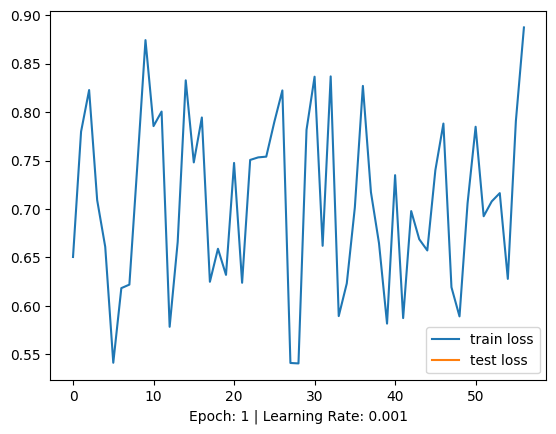

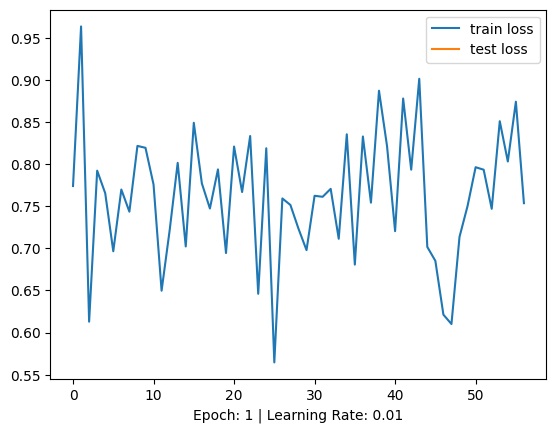

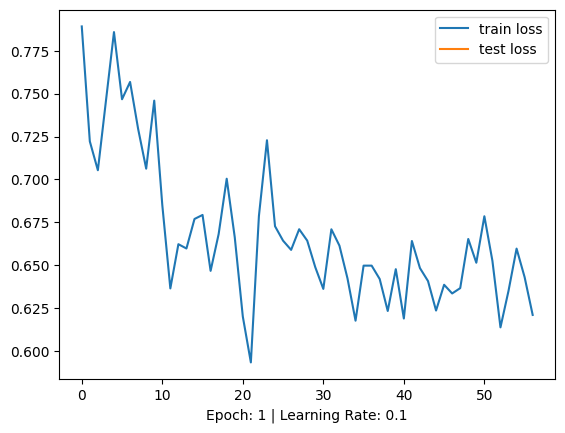

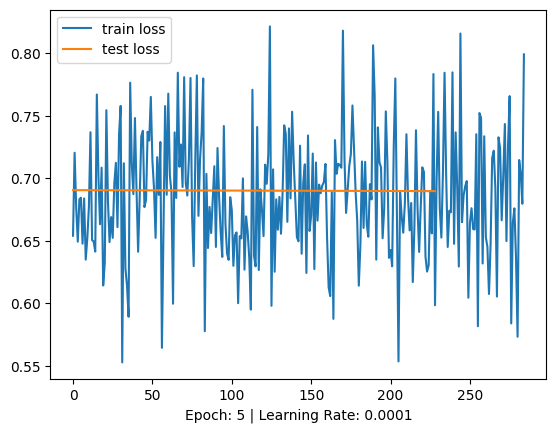

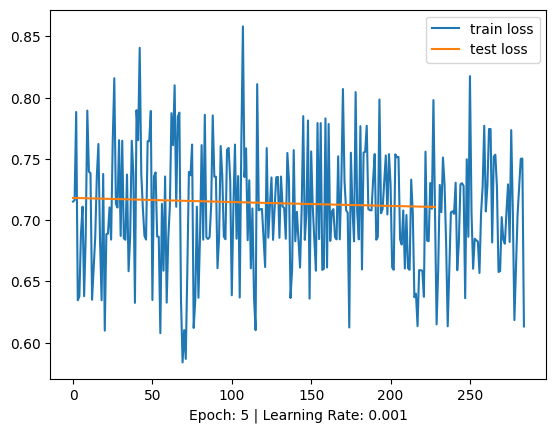

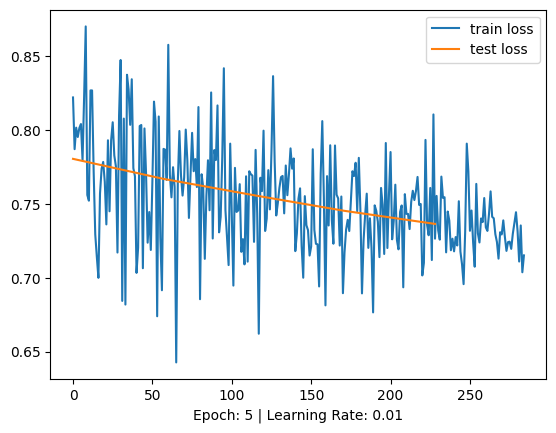

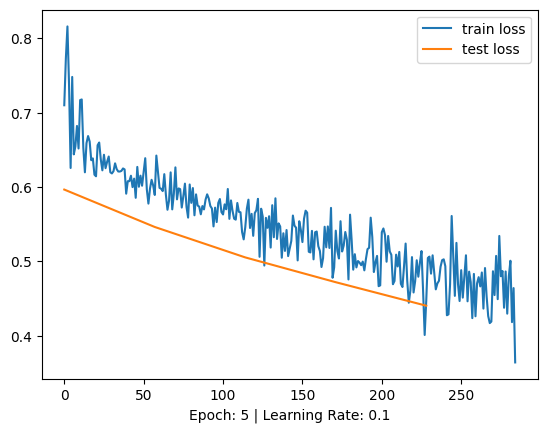

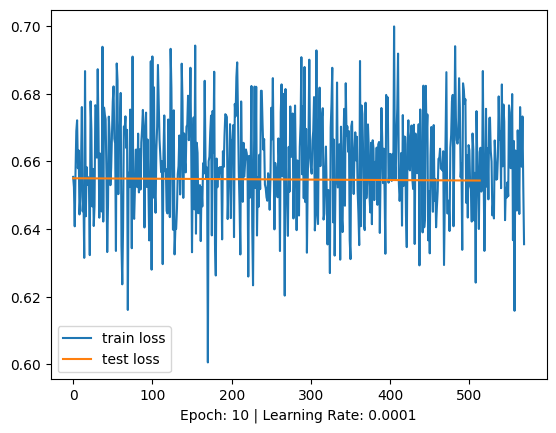

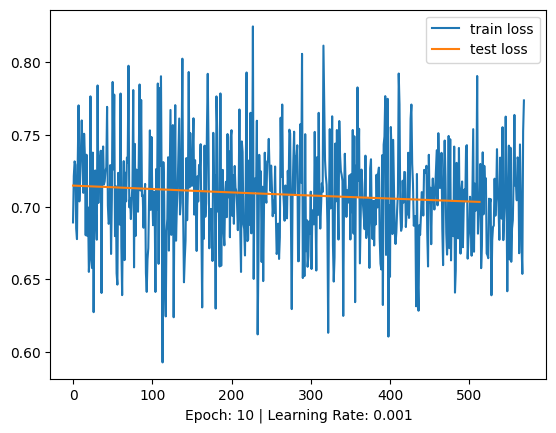

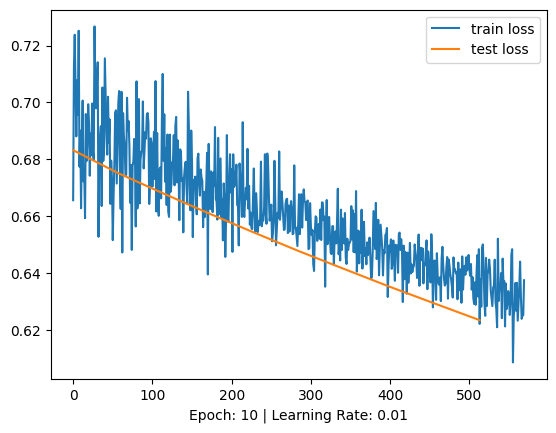

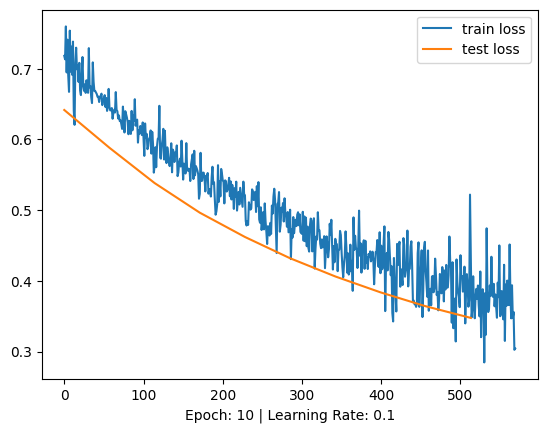

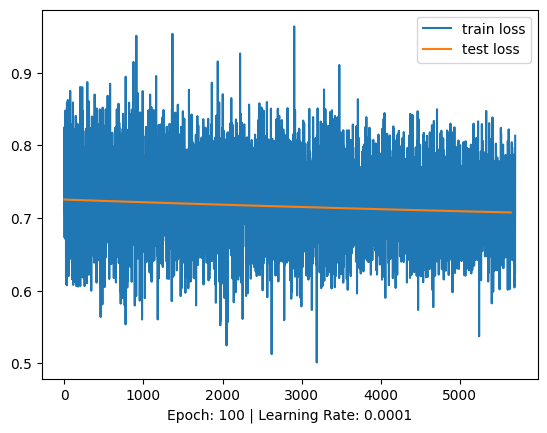

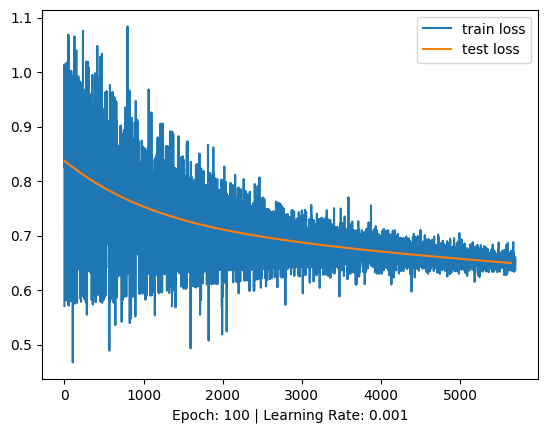

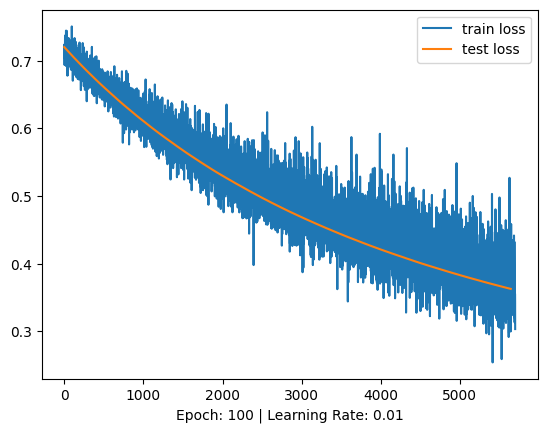

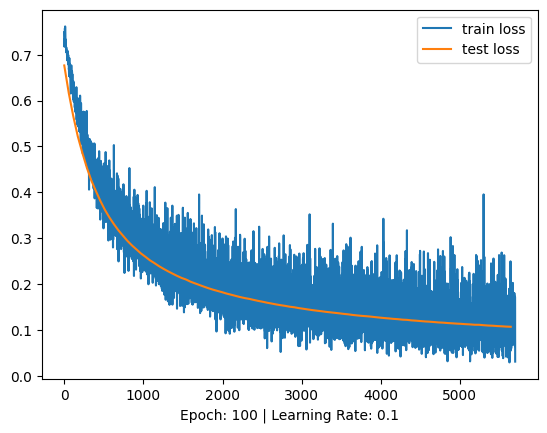

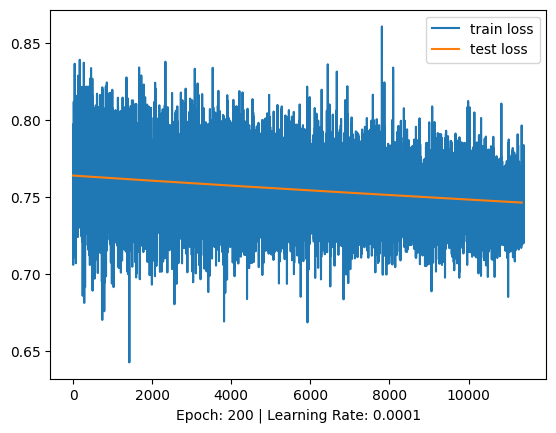

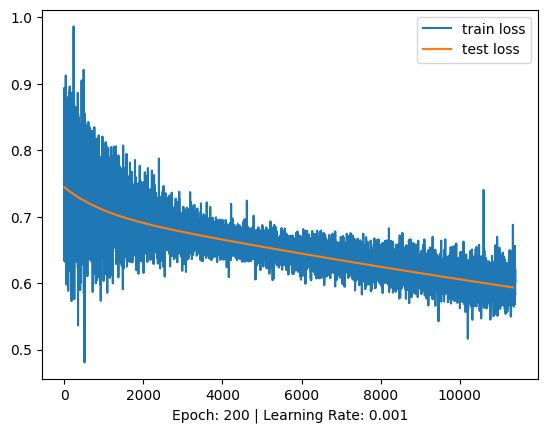

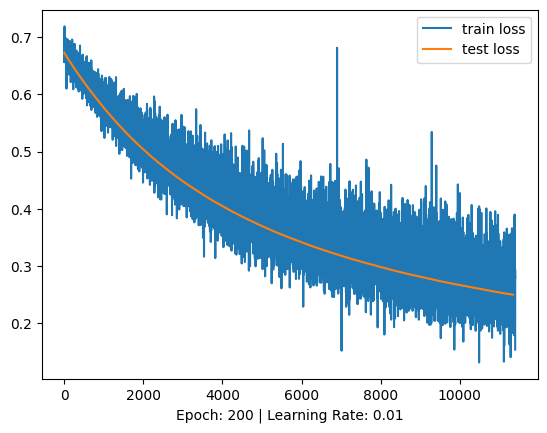

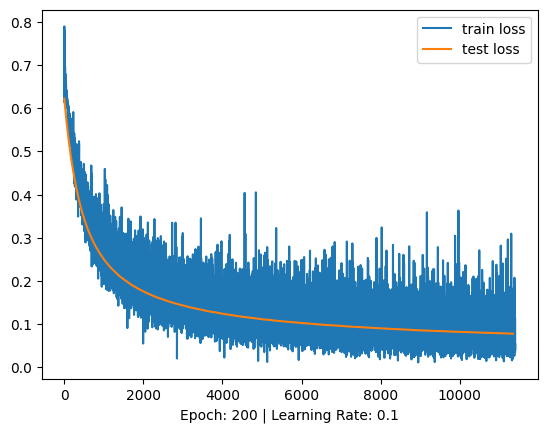

In [68]:
epochs = [1,5,10,100,200]

learning_rates = [0.0001, 0.001, 0.01, 0.1]

for epoch in epochs:

    for learning_rate in learning_rates:
    
        train_loss, eval_loss, train_dataloader = train_model(learning_rate=learning_rate, epochs=epoch)
        plot_loss(train_loss, epoch, learning_rate, evaluation_losses=eval_loss, train_dataloader=train_dataloader, num_epochs=epoch)

**2)**

Testa nedan kodsnutt för ett antal olika sampels. Ser det bättre ut nu?

**Varför tror du att logistisk regression kallas just regression, även fast vi använder det till klassificering?**

Svar: Logistisk regression kallas "regression" eftersom den använder en regressionsmodell för att beräkna sannolikheten för en händelse. Trots att den används för klassificering, där målet är att fördela observationer i klasser, bygger den på att förutsäga en kontinuerlig sannolikhet som sedan omvandlas till en klass.

In [ ]:
sample = 104                                     # välj här vilken sample som helst, ange värde mellan 0-899

sample_features = x_train[sample]                # extrahera features
sample_class = y_train[sample]                   # extrahera class (1 eller 0)

model_prediction = model(sample_features)        # predicta outcome

In [ ]:
print('True class              :', sample_class.item())
print('Vår models predict      :', model_prediction.item())

**2)**

Fokusera nu på evalueringssektionen i vår träningskod. Säkerställ att du förstår vad som händer, steg för steg!

**3)**

Nu ska vi visualisera det vår evalueringssektion fångade upp. Ersätt de sista raderna kod (de som plottar) i träningsscellen med följande:

________________________________________________________

plt.plot(batch_losses, label='train loss')
plt.plot(np.arange(0, epochs)*(len(train_dataloader)), evaluation_losses, label='test loss')
plt.legend()
plt.xlabel('batch')
plt.show()
________________________________________________________

Testa nu att köra om din träningsloop för olika kombinationer av epoch och learning rate. 

Vad ser du? Does it make sense?

**4**

Gå tillbaks till början av vår notebook och försök att generera ett dataset som är svårare att klassificera, dvs ett där våra blobs inte går att separera like lätt. Du kan enkelt generera nya dataset genom att ändra på make_blobs-funktionens parameter random_state. 

Hitta ett värde på random_state som ger oss ett svårare dataset - träna sedan en ny modell (med olika värden på epoch och learning rate) och tolka det du ser.